In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\athar\OneDrive\Desktop\python\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [2]:
df.info

<bound method DataFrame.info of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0

In [5]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

In [7]:
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

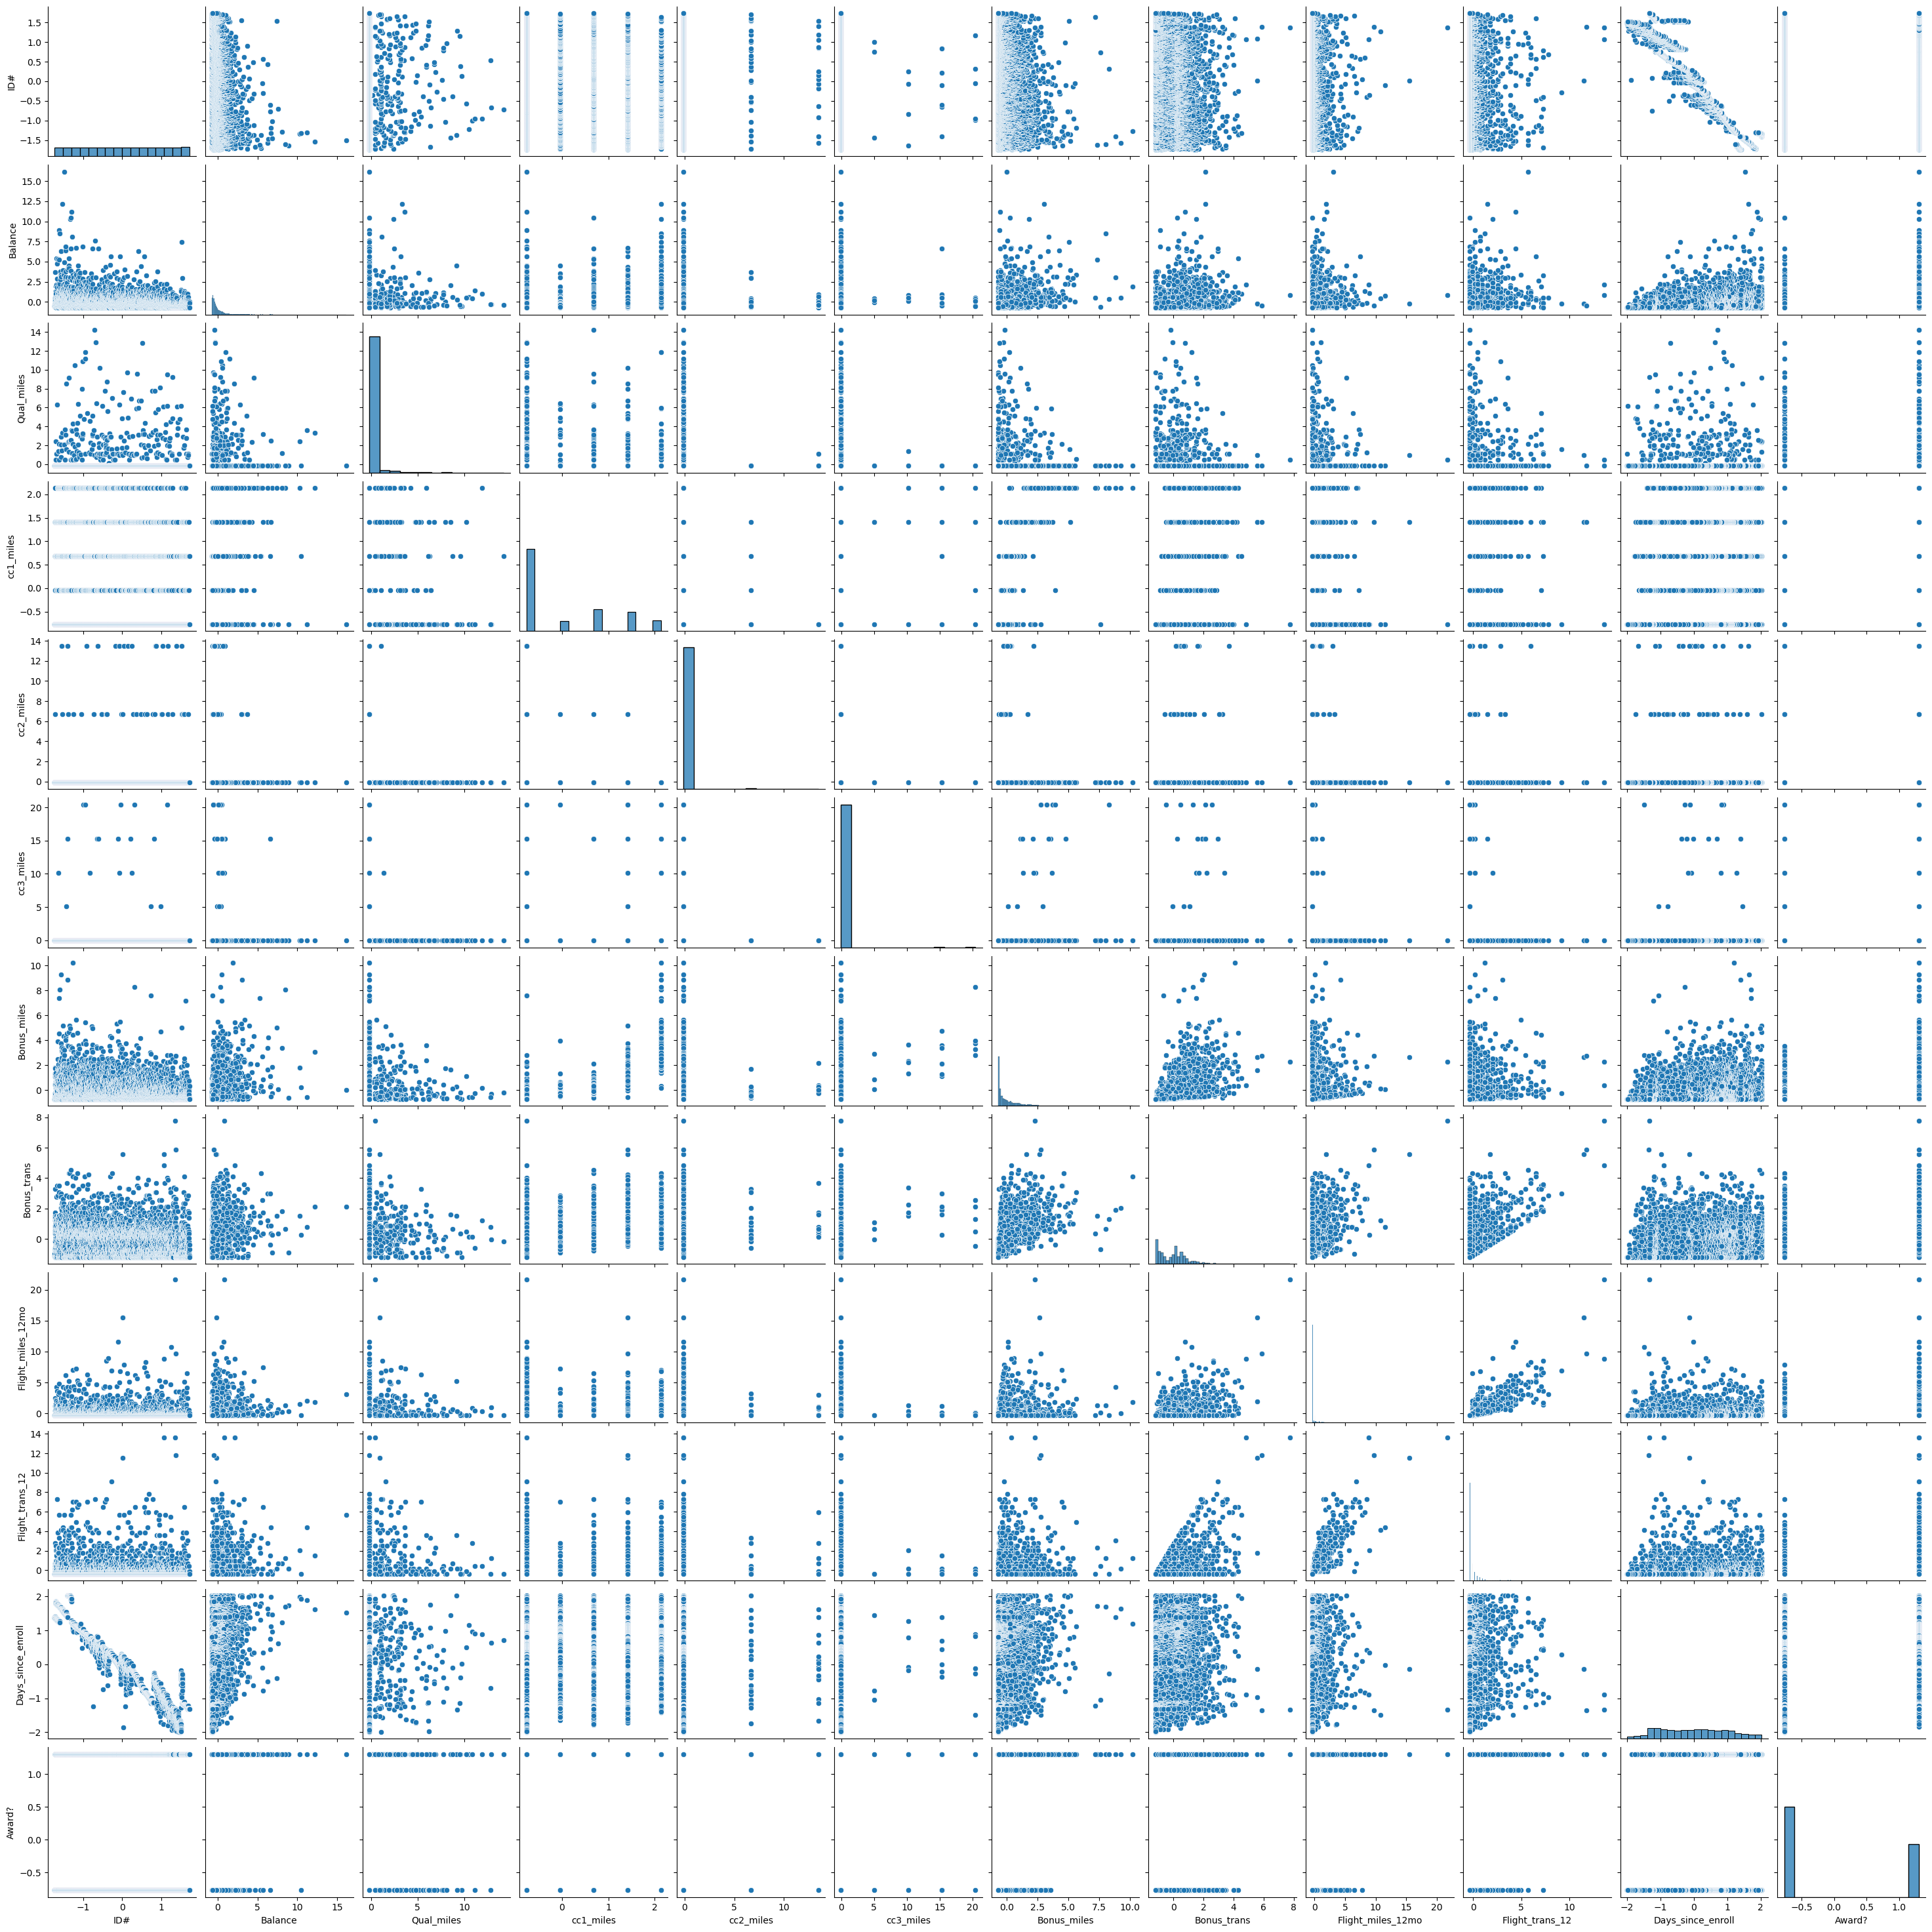

In [9]:
# Pairplot for visualizing the distribution and relationships
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))
plt.show()


C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\clust

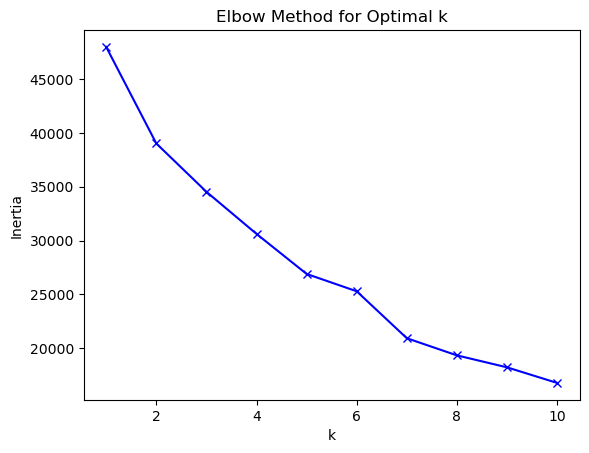

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


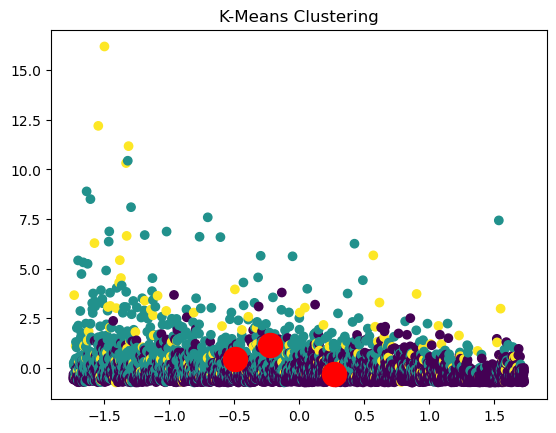

In [13]:
# Determine optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Assume optimal K is found to be 3 from the plot
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Visualize K-Means clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('K-Means Clustering')
plt.show()


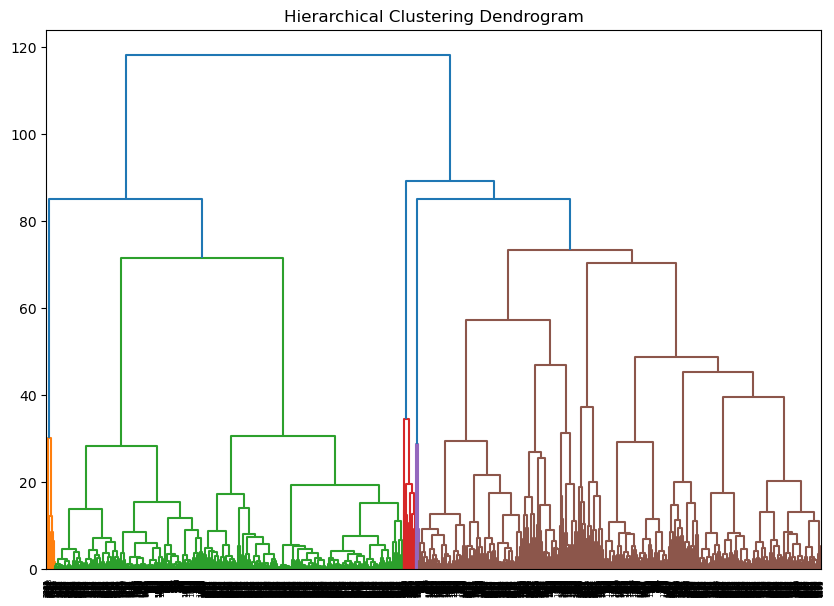

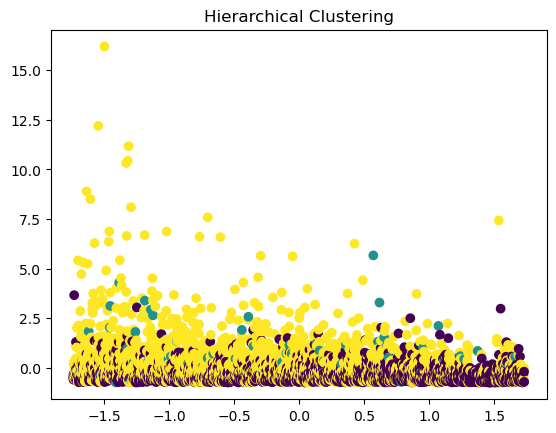

In [14]:
# Hierarchical clustering with 'ward' linkage
Z = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Create clusters
hierarchical_labels = fcluster(Z, t=optimal_k, criterion='maxclust')

# Visualize Hierarchical clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.show()


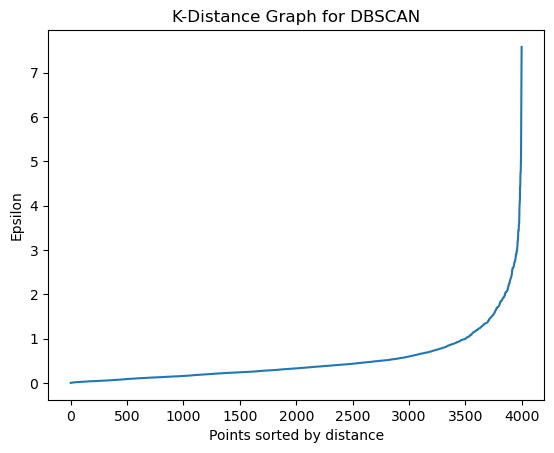

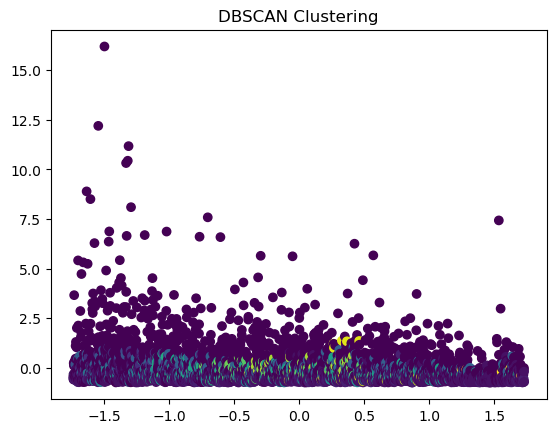

In [15]:
# Finding the optimal value for epsilon using Nearest Neighbors
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

# Assume we find a good epsilon value from the plot, say 0.5
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Visualize DBSCAN clustering
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [16]:
# Evaluate K-Means
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

# Evaluate DBSCAN
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')


K-Means Silhouette Score: 0.28094828366390856
DBSCAN Silhouette Score: -0.2823258834687895


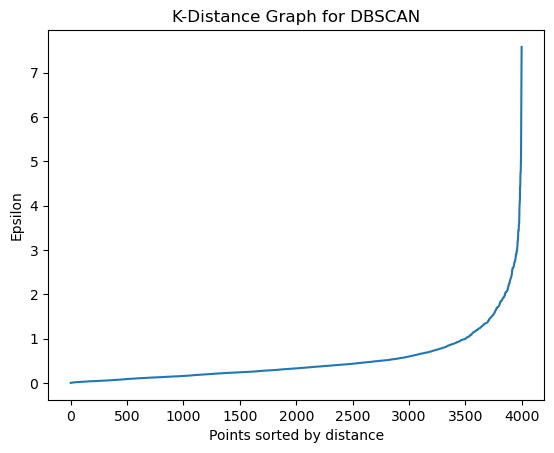

New DBSCAN Silhouette Score: -0.44169976890830664


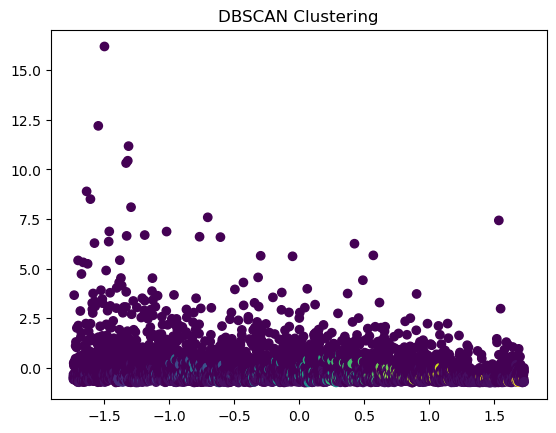

In [22]:
from sklearn.neighbors import NearestNeighbors

# Finding the optimal value for epsilon using Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

# Adjust epsilon and min_samples based on the graph
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Try different values
dbscan_labels = dbscan.fit_predict(df_scaled)

# Evaluate new DBSCAN result
dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
print(f'New DBSCAN Silhouette Score: {dbscan_silhouette}')

plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\athar\anaconda3\Lib\site-packages\sklearn\clust

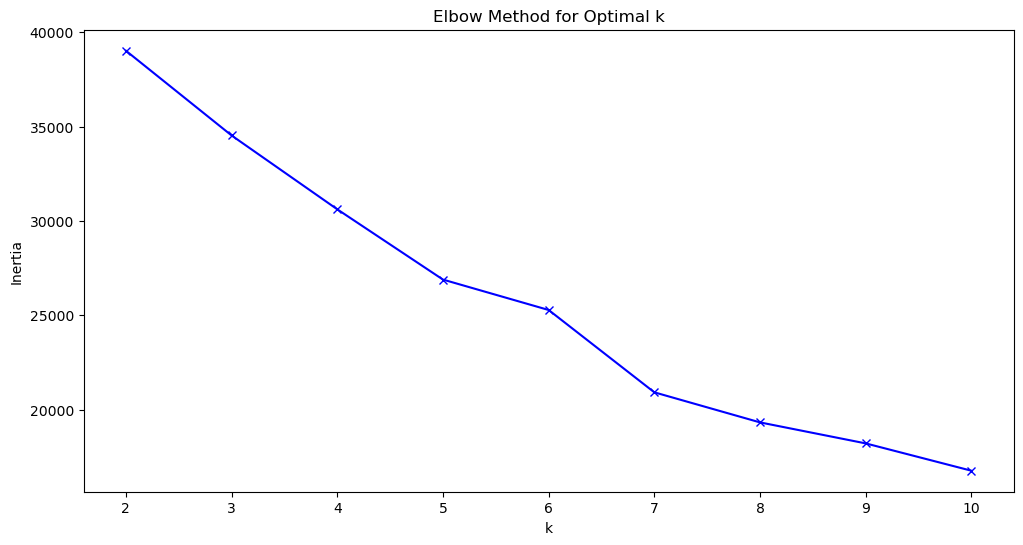

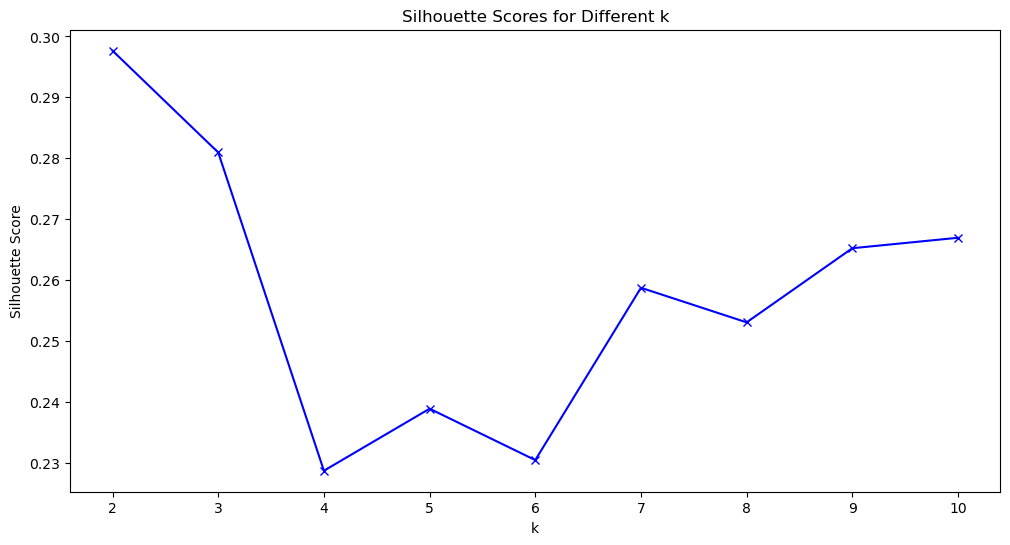

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal K for K-Means: 2
New K-Means Silhouette Score: 0.29764766197813075


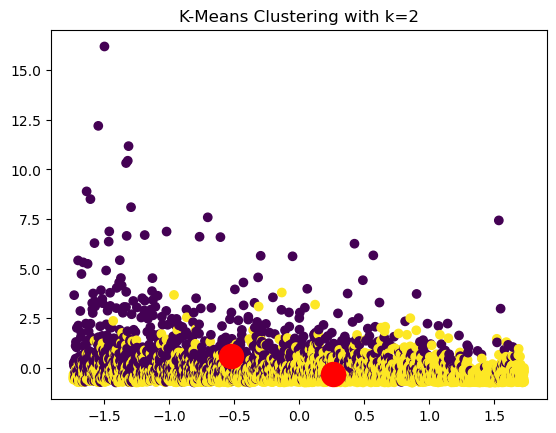

In [23]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans_labels))

plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

# Choose the best k based on the silhouette scores
optimal_k = k_values[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

print(f'Optimal K for K-Means: {optimal_k}')
print(f'New K-Means Silhouette Score: {silhouette_score(df_scaled, kmeans_labels)}')

plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.show()


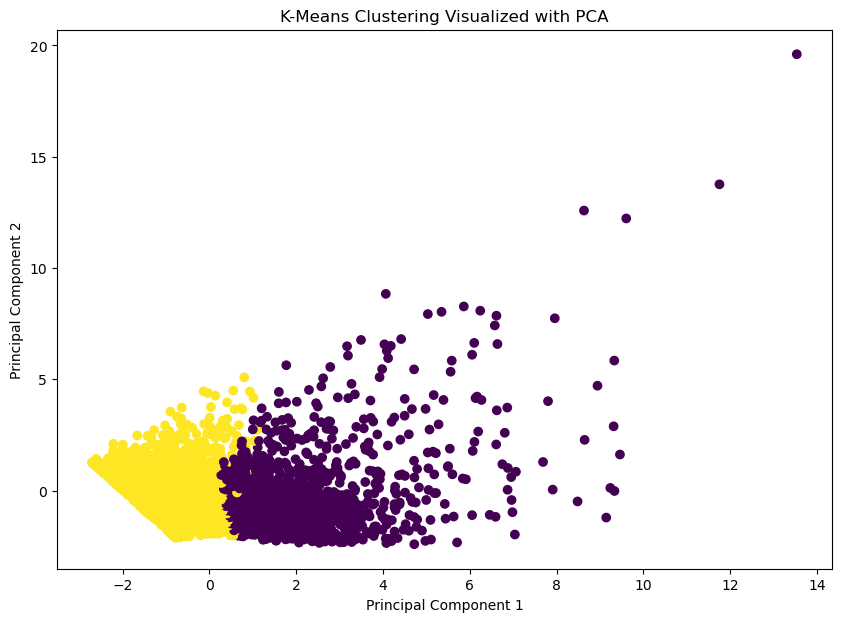

In [26]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Agglomerative Clustering Silhouette Score: 0.1952883252471116


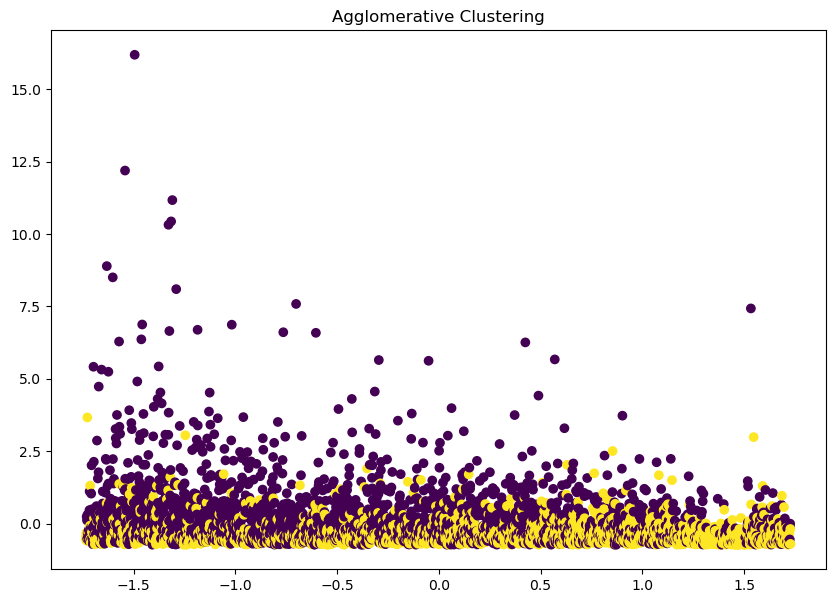

In [27]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_cluster.fit_predict(df_scaled)

agg_silhouette = silhouette_score(df_scaled, agg_labels)
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette}')

plt.figure(figsize=(10, 7))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()
